In [31]:
import numpy as np
import torch
import matplotlib.pyplot as plt

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


In [32]:
# set dimensions
R, C = 890, 580  # width, height
N = 40  # number of illumination patterns
W = 25  # number of wavelengths
M = R * C  # number of total elements in A and B

# R, C = 640, 640  # width, height
# N = 42  # number of illumination patterns
# W = 29  # number of wavelengths
# M = R * C  # number of total elements in A and B

## Check with x_gt

In [48]:
A = torch.tensor(np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/A.npy'))
b = torch.tensor(np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/I.npy'))
x_gt = torch.tensor(np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/x_gt.npy'))

In [49]:
x_gt.shape, A.shape, b.shape 
# A * x_gt = b 
# b : B, # pixel, N*3
b = b.reshape(-1,3*N)
x_gt = x_gt.reshape(-1, 25)

In [50]:
b = b.flatten()
idx = torch.where(b > 0.95)

b[idx] = 0

A = A.reshape(-1, W)
A[idx] = 0

In [51]:
x_gt.shape, A.shape, b.shape 
# A * x_gt = b 
# b : B, # pixel, N*3
b = b.reshape(-1,3*N)
x_gt = x_gt.reshape(-1, 25)

In [52]:
A = A.reshape(C*R, 3*N, W)

In [53]:
idx = 890 * 290 + 222
A = A[idx]
x_gt = x_gt[idx]
b = b[idx]

In [54]:
list_A = list(A.unsqueeze(dim =0))
# list_A = list(A)
block = torch.block_diag(*list_A)

In [55]:
block.shape, b.shape, len(list_A)

(torch.Size([120, 25]), torch.Size([120]), 1)

In [56]:
# x_sol = torch.linalg.lstsq(block, b.flatten(), driver='gelsy')
x_sol = torch.linalg.lstsq(block, b.unsqueeze(1), driver='gelsy')

x = x_sol.solution

In [57]:
block.shape, b.shape

(torch.Size([120, 25]), torch.Size([120]))

In [67]:
b_est = A@x

In [68]:
b_est.shape

torch.Size([120])

In [69]:
b_est_rgb = b_est.reshape(N,3)

In [70]:
b_rgb = b.reshape(N,3)

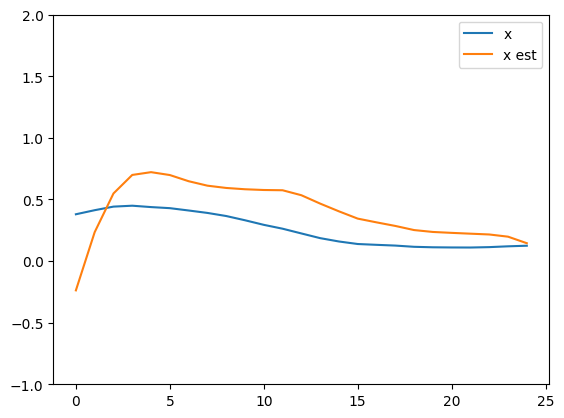

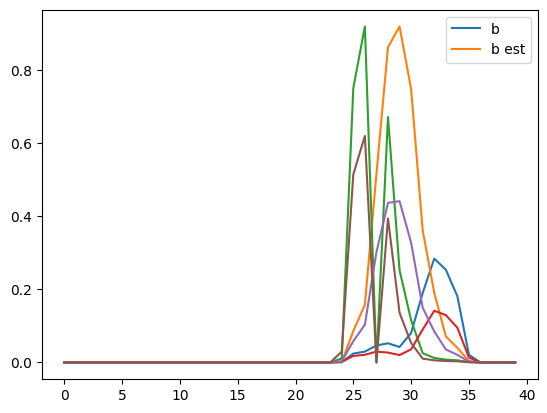

In [72]:
plt.figure()
plt.plot(x_gt)
plt.plot(x)
plt.legend(['x', 'x est'])
plt.ylim([-1, 2])

plt.figure()
plt.plot(b_rgb[:,0])
plt.plot(b_rgb[:,1])
plt.plot(b_rgb[:,2])
plt.plot(b_est_rgb[:,0])
plt.plot(b_est_rgb[:,1])
plt.plot(b_est_rgb[:,2])
plt.legend(['b', 'b est'])

## Compare

In [12]:
A = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/A.npy')
b = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/I.npy')

A_prev = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/AandI/A.npy')
b_prev = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/AandI/I.npy')

In [13]:
b.shape, b_prev.shape

((61944000, 1), (51609600, 1))

In [14]:
b.shape

(61944000, 1)

In [15]:
A_reshape, A_prev_reshape = A.reshape(C, R, N, 3, W), A_prev.reshape(640, 640, 42, 3, 29)
b_reshape, b_prev_reshape = b.reshape(C, R, N, 3), b_prev.reshape(640, 640, 42, 3)

/home/shshin/.conda/envs/hyper3d/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


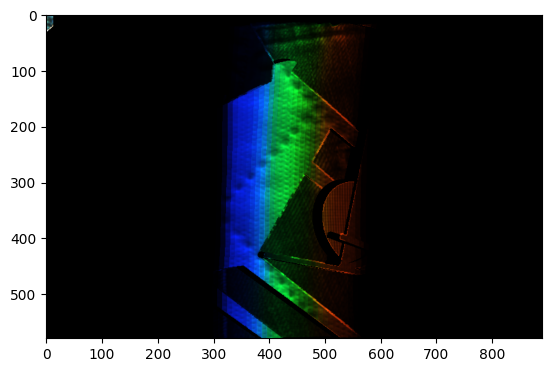

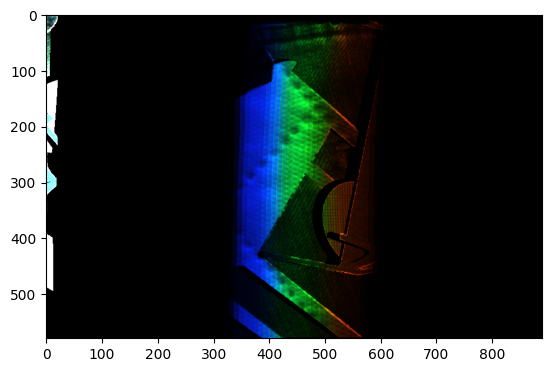

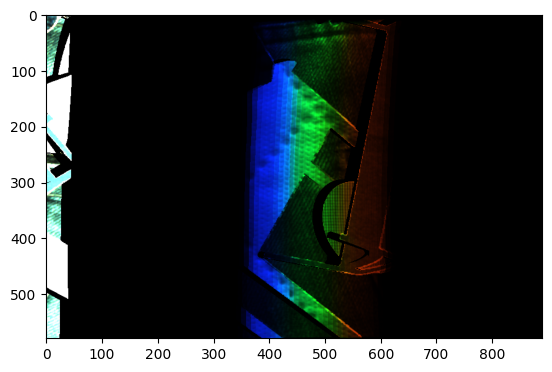

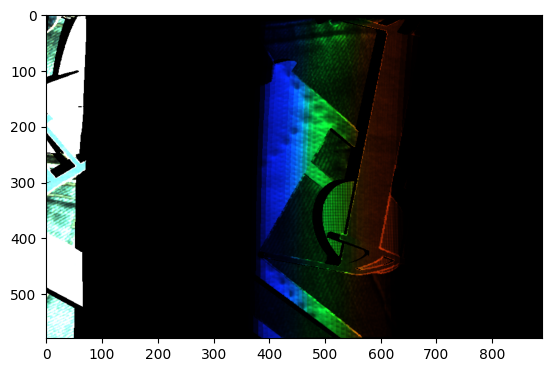

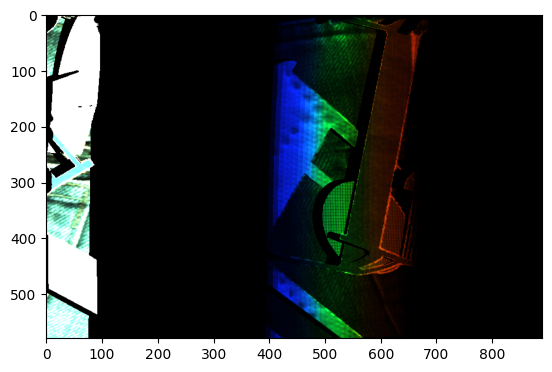

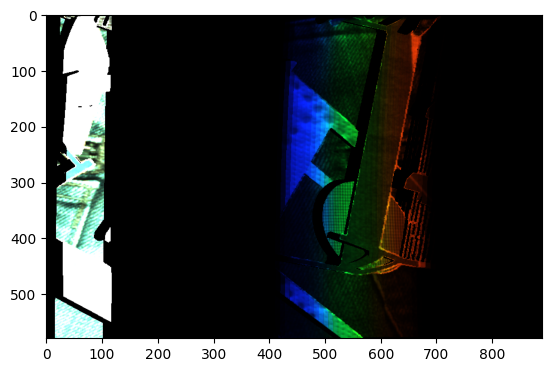

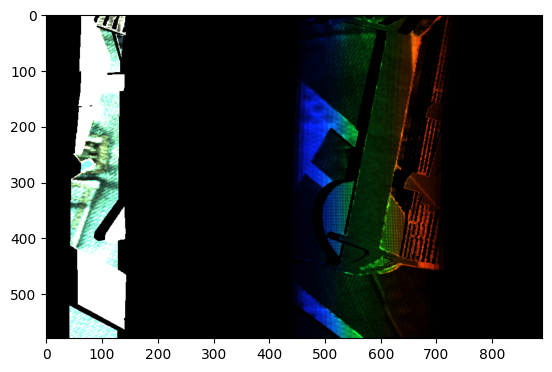

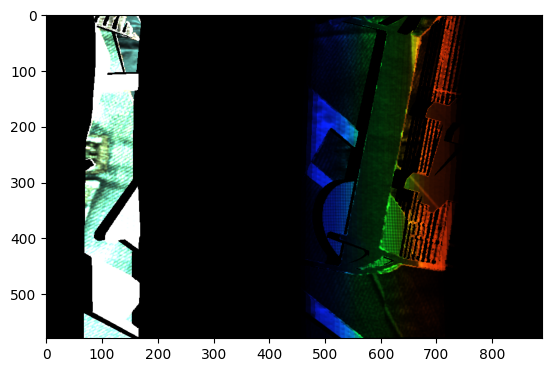

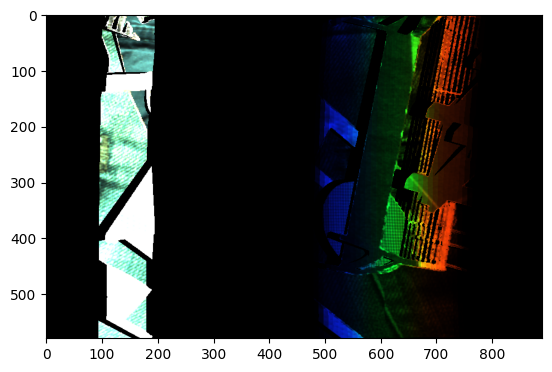

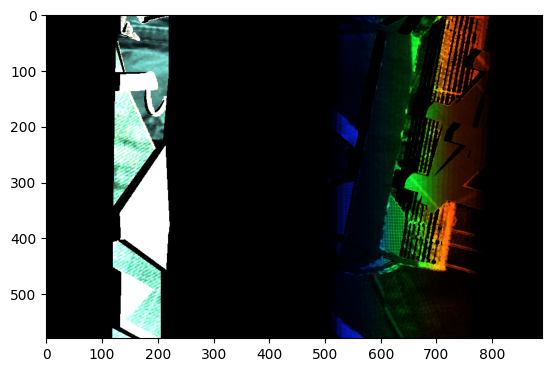

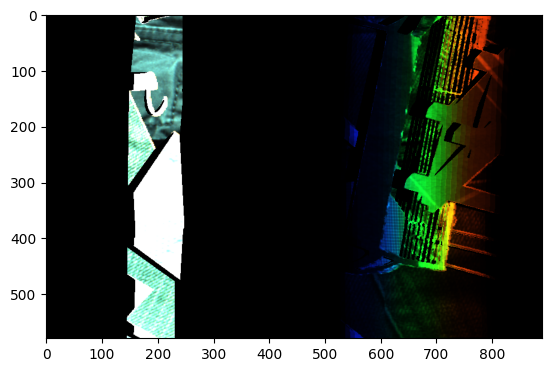

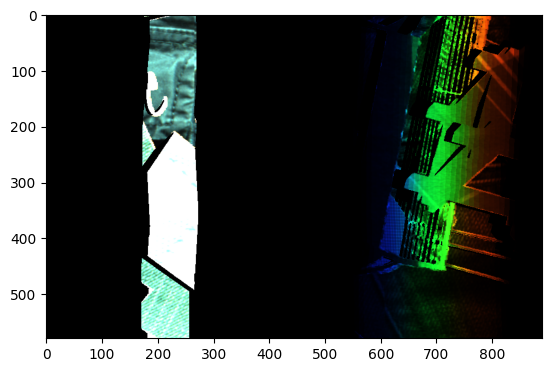

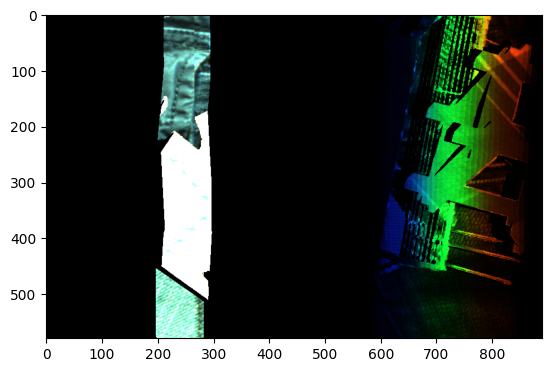

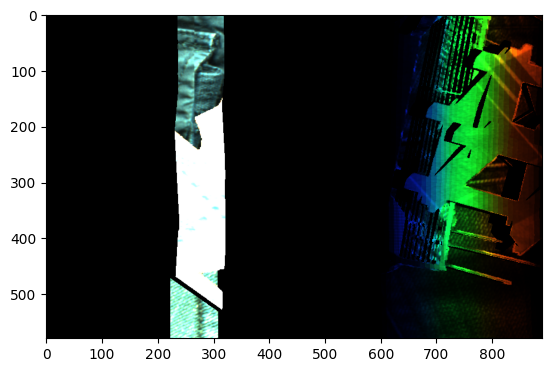

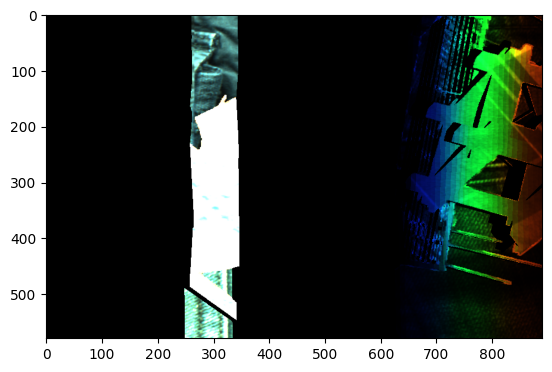

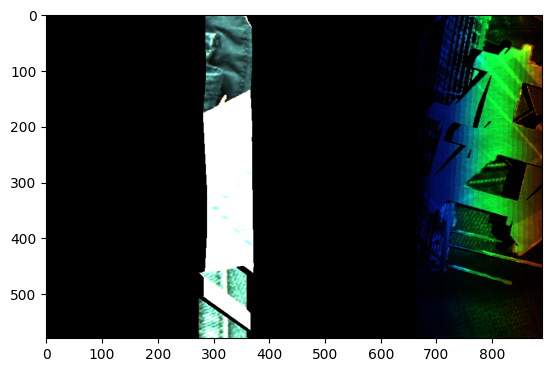

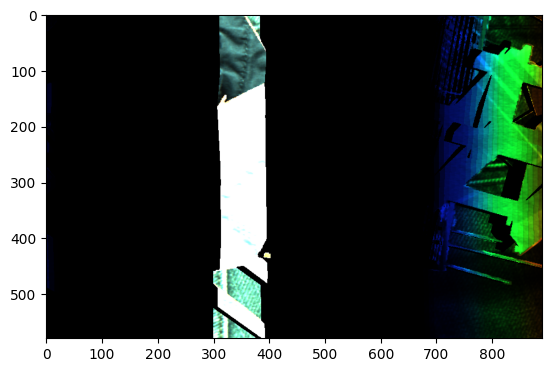

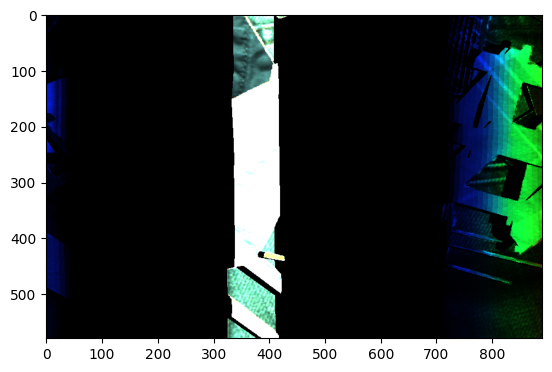

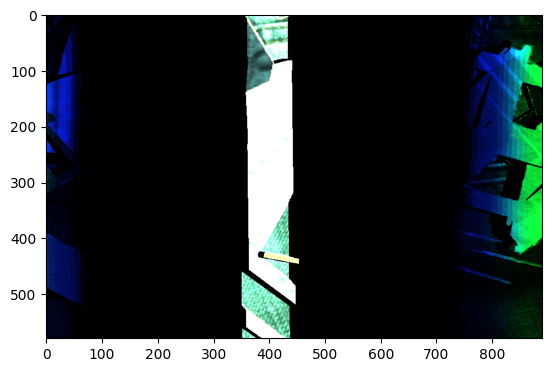

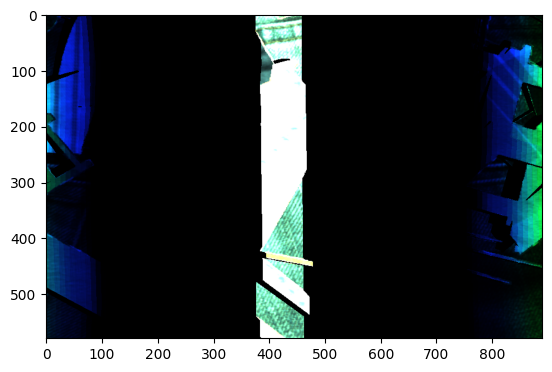

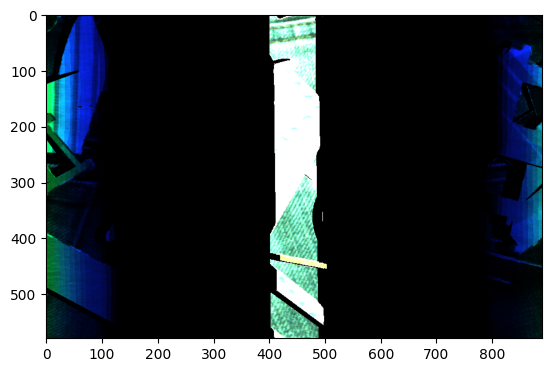

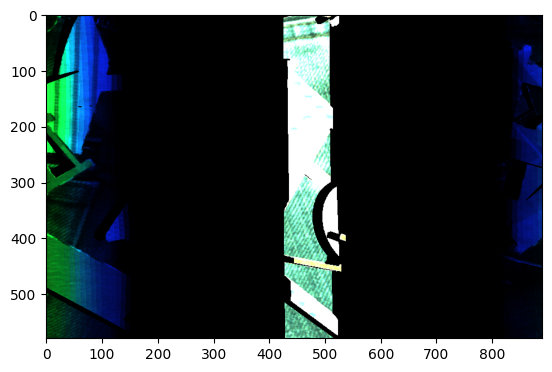

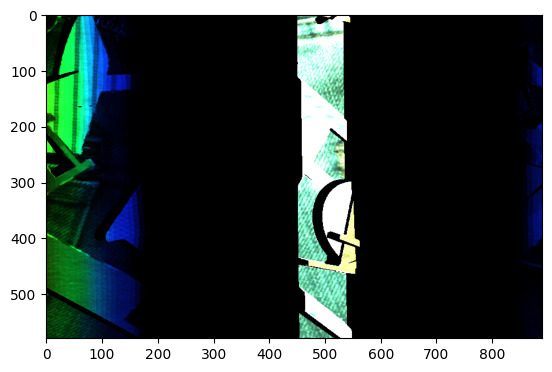

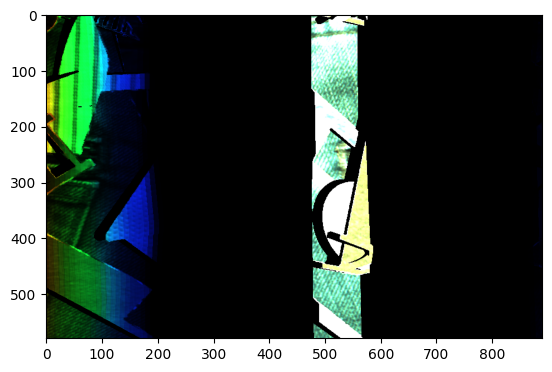

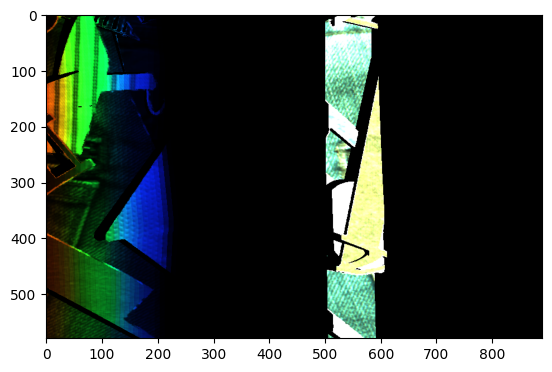

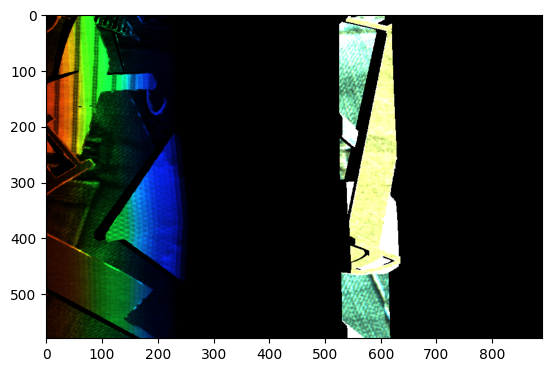

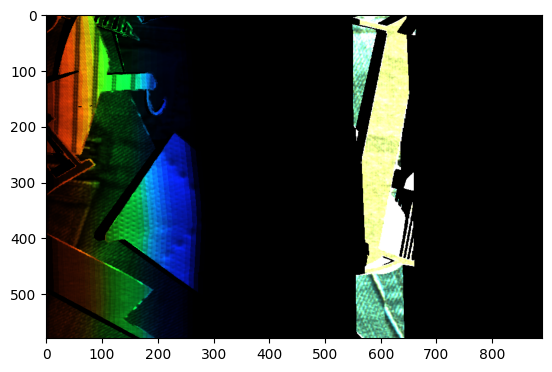

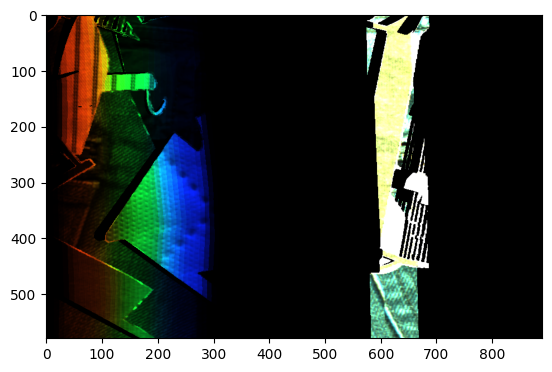

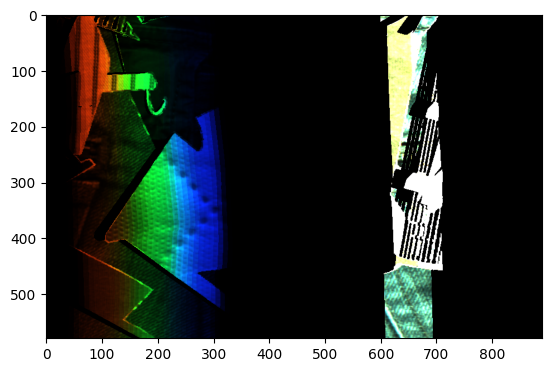

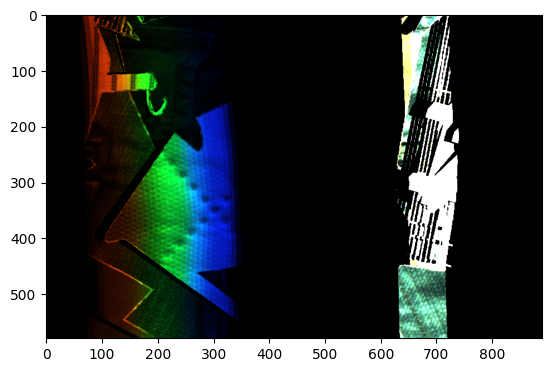

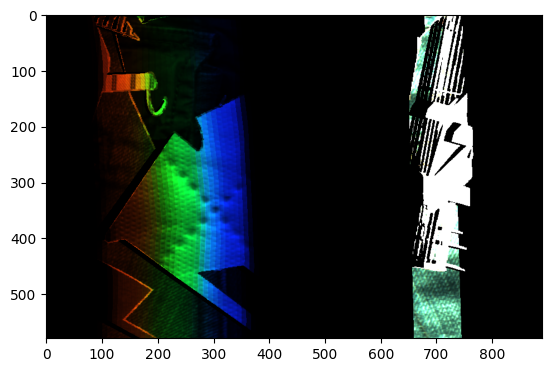

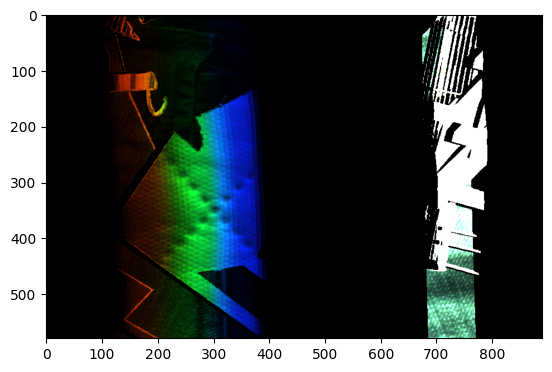

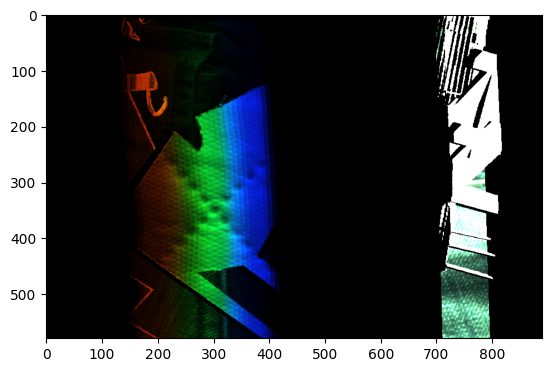

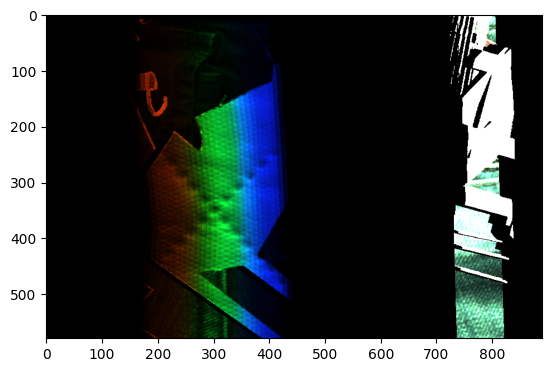

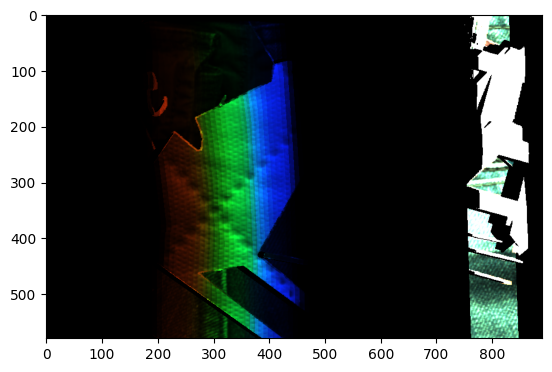

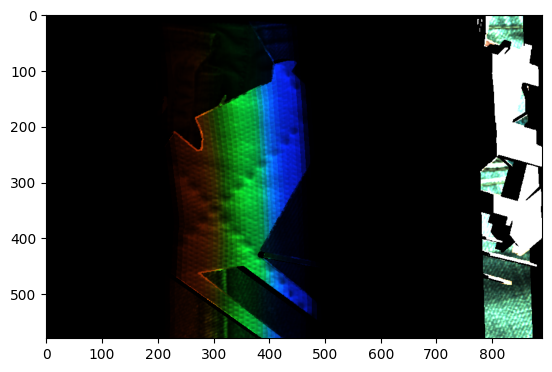

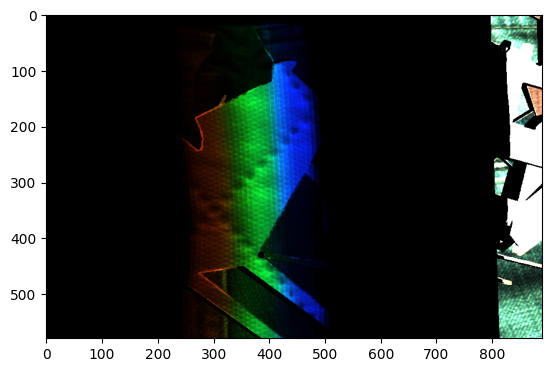

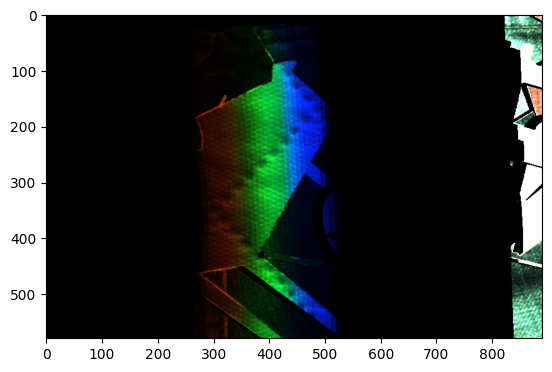

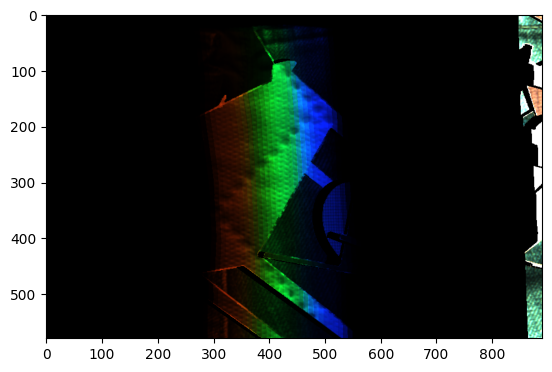

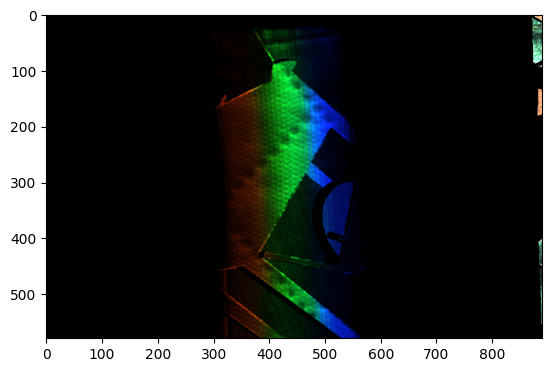

In [16]:
for i in range(N):
    plt.figure()
    plt.imshow(b_reshape[:,:,i,:])

/home/shshin/.conda/envs/hyper3d/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


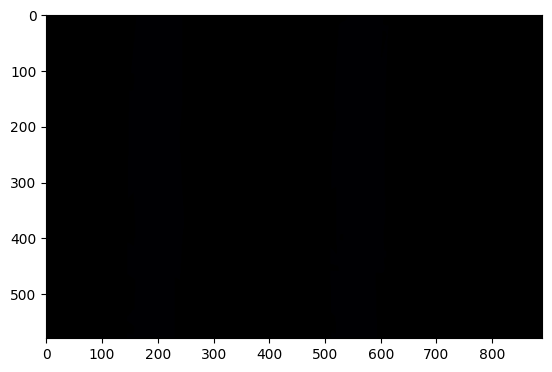

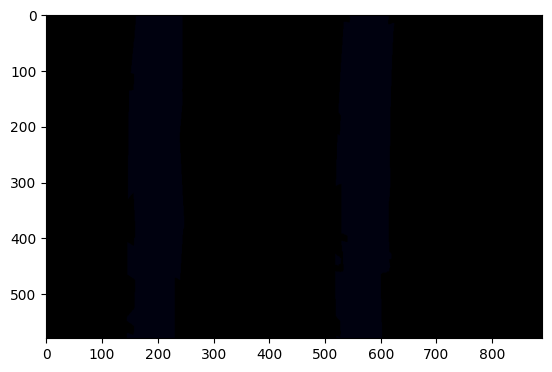

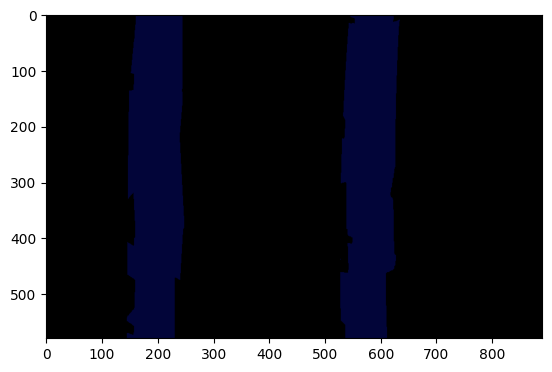

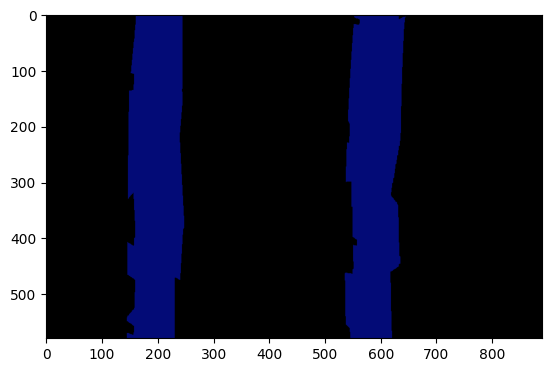

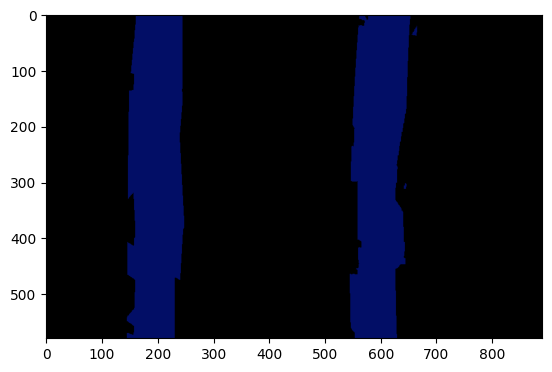

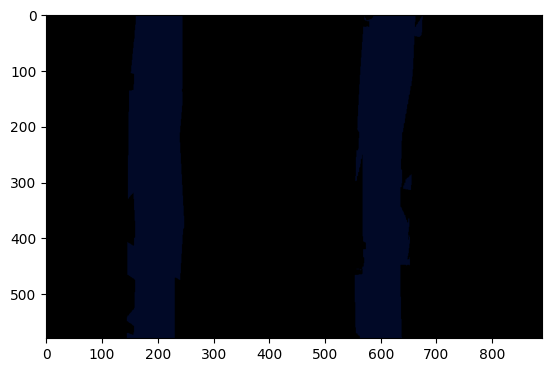

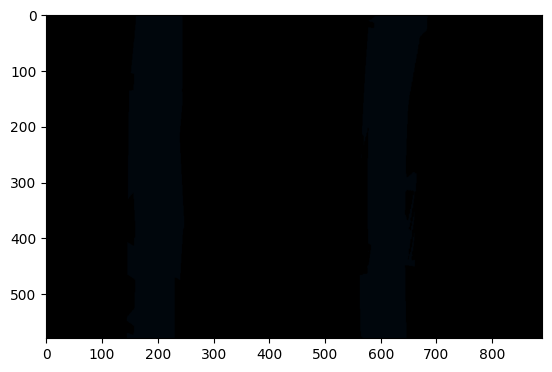

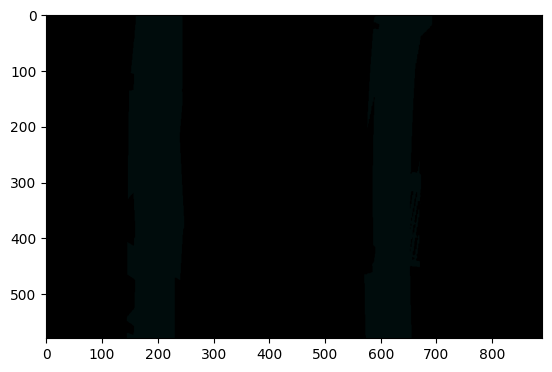

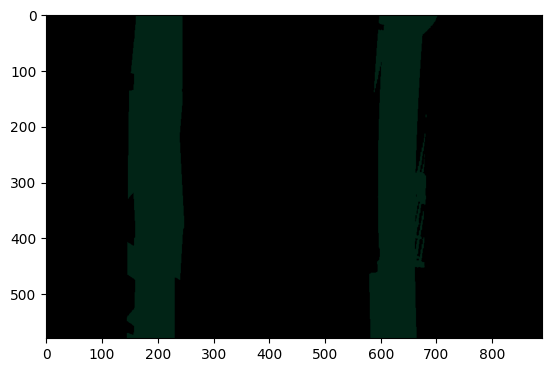

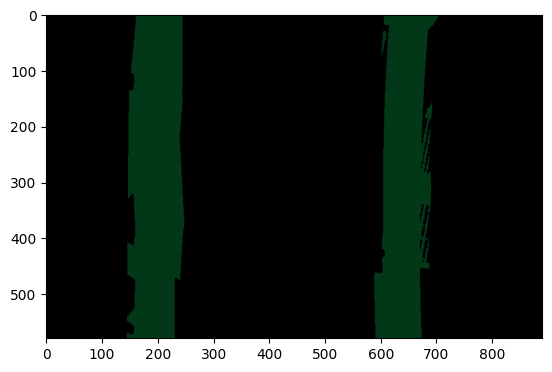

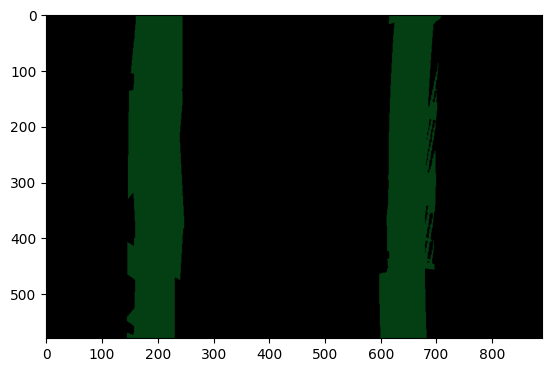

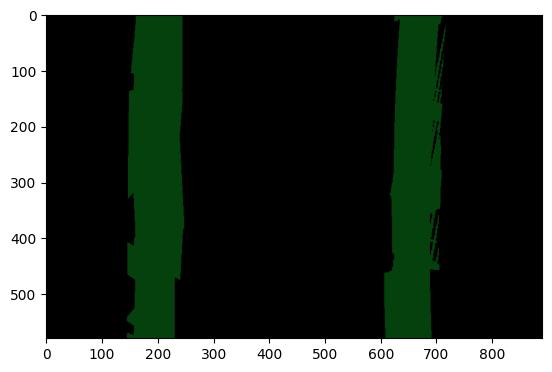

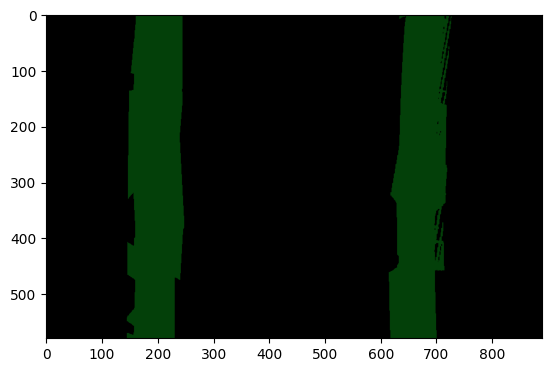

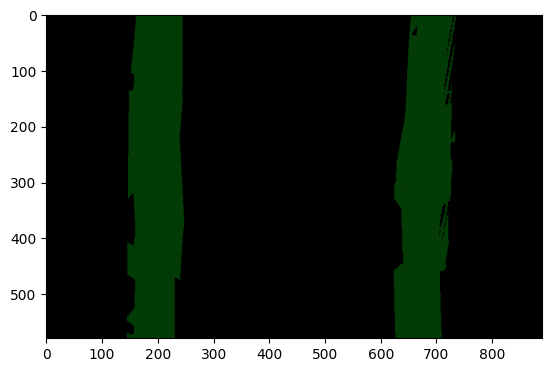

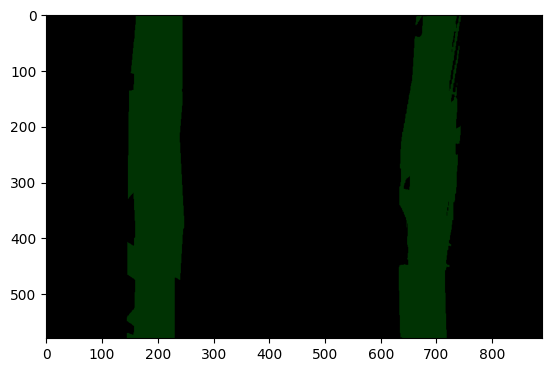

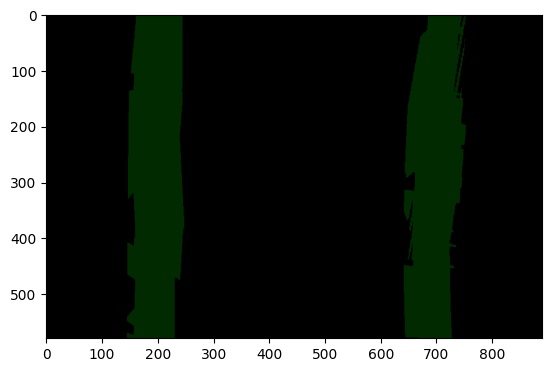

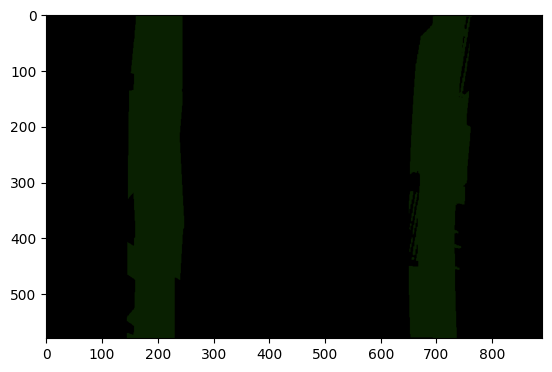

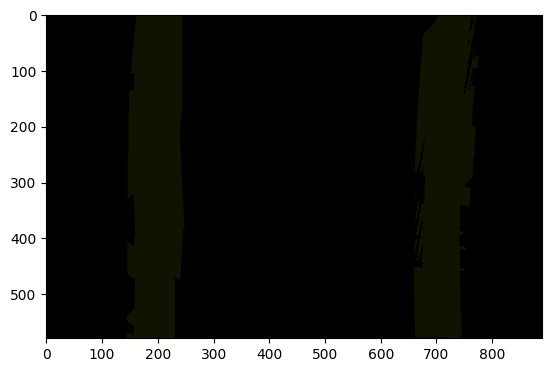

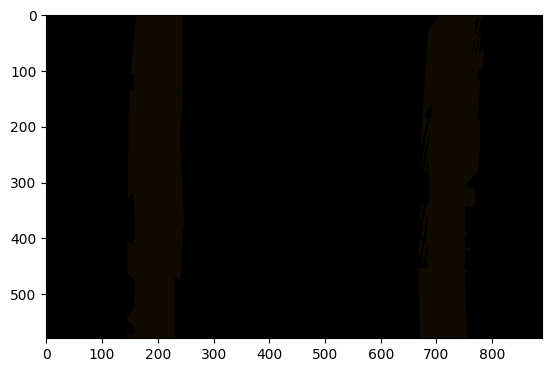

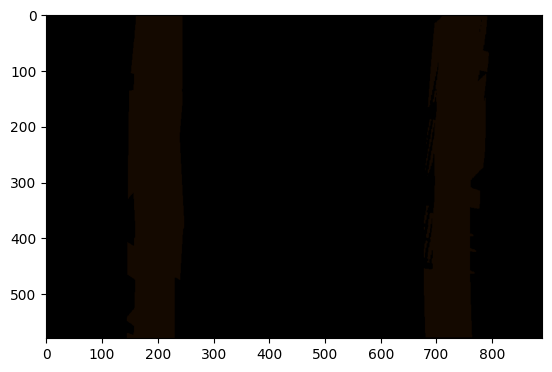

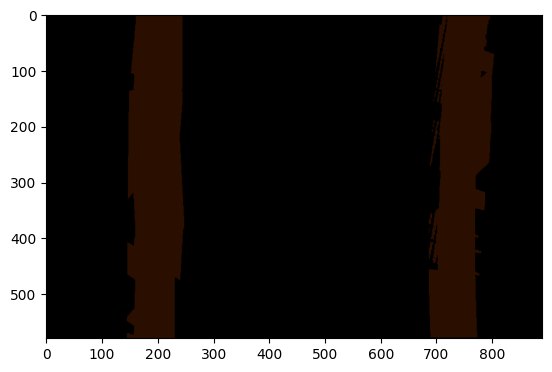

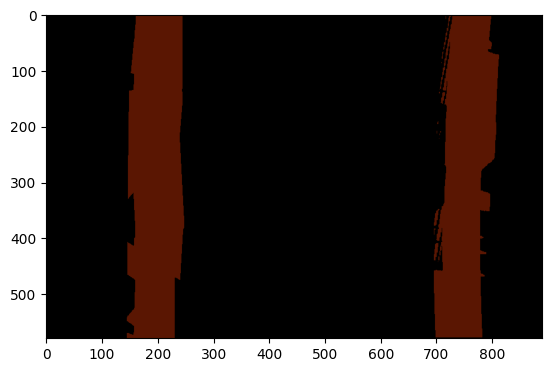

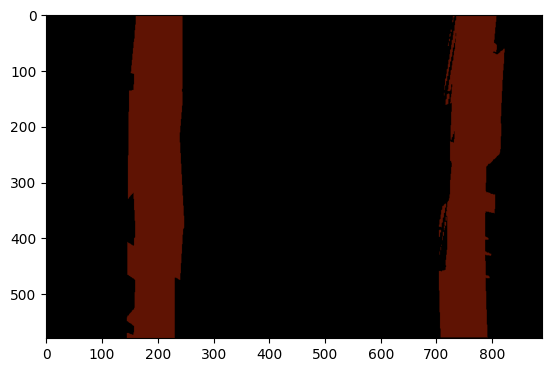

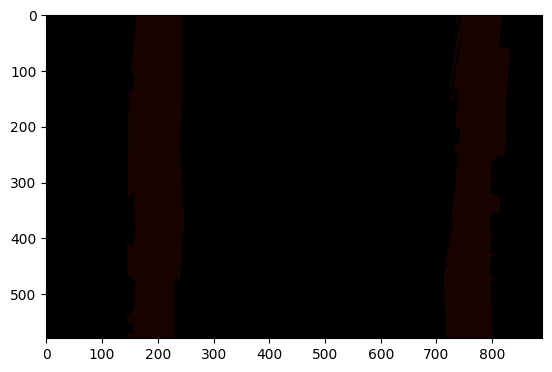

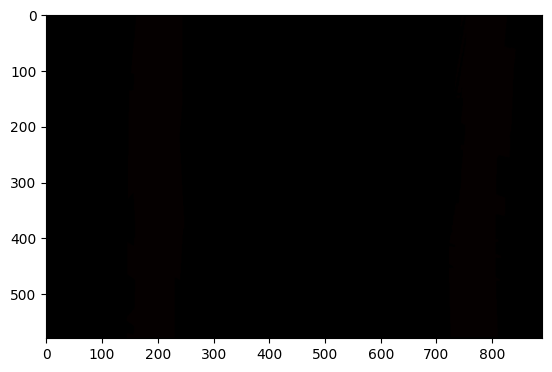

In [17]:
for i in range(25):
    plt.figure()
    plt.imshow(A_reshape[:,:,10,:,i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x7fadc8576150>)

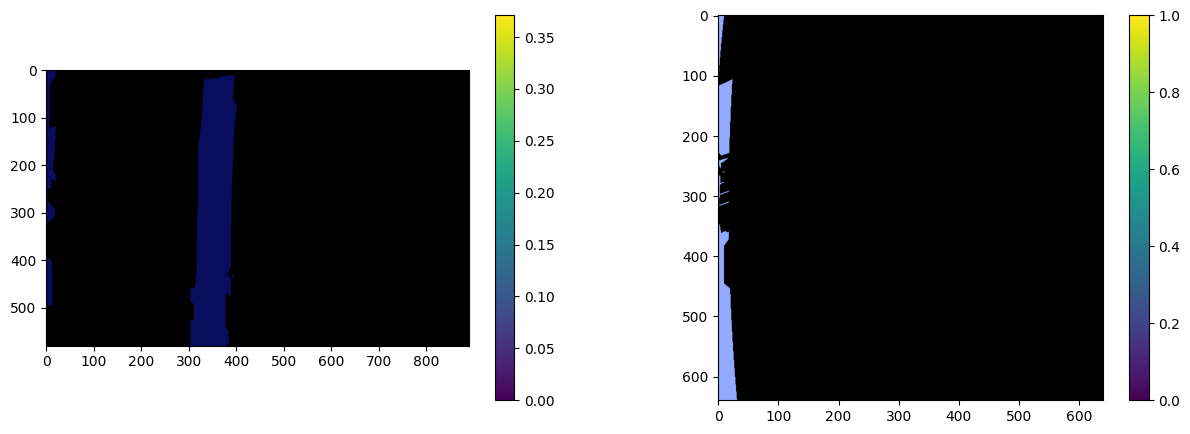

In [18]:
import matplotlib.pyplot as plt

n_illum = 1
n_wvl = 0

fig = plt.figure(figsize=(15,5))


plt.subplot(121), plt.imshow(A_reshape[:,:,n_illum,:,n_wvl]*30), plt.colorbar()
plt.subplot(122), plt.imshow(A_prev_reshape[:,:,n_illum,:,n_wvl]*1000), plt.colorbar()

(<AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x7fade0197a90>)

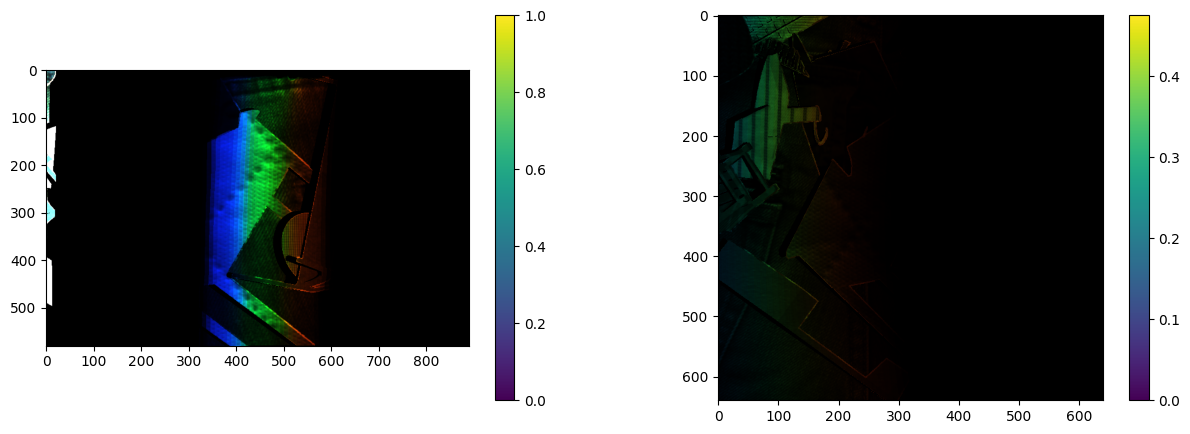

In [19]:
n_illum = 1
n_wvl = 0

fig = plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(b_reshape[:,:,n_illum,:]), plt.colorbar()
plt.subplot(122), plt.imshow(b_prev_reshape[:,:,n_illum,:]*10), plt.colorbar()

In [20]:
A.shape

(516200, 120, 25)

In [84]:
C, R

(580, 890)

In [86]:
load_dat = True
if load_dat:
    A = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/A.npy')
    b = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/I.npy')

    # A = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/AandI/A.npy')
    # b = np.load('/home/shshin/Scalable-Hyperspectral-3D-Imaging/AandI/I.npy')
    b = b.flatten()
    idx = np.where(b > 0.95)

    b[idx] = 0

    A = A.reshape(-1, W)
    A[idx] = 0

    A = A.reshape(C, R, 1, 3*N, W)
    b = b.reshape(C, R, 1, 3*N, 1)
    
    A1 = A[:290,:445]
    A2 = A[:290,445:]
    A3 = A[290:,:445]
    A4 = A[290:,445:]
    
    b1 = b[:290,:445]
    b2 = b[:290,445:]
    b3 = b[290:,:445]
    b4 = b[290:,445:]
    
    A_list = [A1,A2,A3,A4]
    b_list = [b1,b2,b3,b4]
    
    
else:
    # create PyTorch tensors for A and B
    A = np.random.randn(R*C, 1, 3*N, W).astype(np.float32)
    X_gt = np.random.randn(R*C, 1, W, 1).astype(np.float32)

    b = A @ X_gt

In [87]:
r, c = 290, 445

In [88]:
A.shape, b.shape

((580, 890, 1, 120, 25), (580, 890, 1, 120, 1))

In [89]:
def total_variation_loss_l2(img, weight): 
    bs_img, c_img, h_img, w_img = img.size() 
    tv_h = torch.pow(img[:,:,1:,:]-img[:,:,:-1,:], 2).sum() 
    tv_w = torch.pow(img[:,:,:,1:]-img[:,:,:,:-1], 2).sum() 
    return weight*(tv_h+tv_w)/(bs_img*c_img*h_img*w_img)

In [90]:
def total_variation_loss_l1(img, weight): 
    bs_img, c_img, h_img, w_img = img.size() 
    tv_h = torch.abs(img[:,:,1:,:]-img[:,:,:-1,:]).sum() 
    tv_w = torch.abs(img[:,:,:,1:]-img[:,:,:,:-1]).sum() 
    return weight*(tv_h+tv_w)/(bs_img*c_img*h_img*w_img)

In [ ]:
def total_variation_loss_l2_spectrum(img, weight): 
    bs_img, c_img, h_img, w_img = img.size() 
    tv_s = torch.pow(img[:,1:,:,:]-img[:,:-1,:,:], 2).sum()
    return weight*(tv_s)/(bs_img*c_img*h_img*w_img)

In [95]:
batch_size = 200000
num_iter = 5000
num_batches = int(np.ceil(M / batch_size))
loss_f = torch.nn.L1Loss()
losses = []
X_np_all = torch.zeros(C, R, 1, W, 1)

# define initial learning rate and decay step
lr = 1
decay_step = 500


# A = A.reshape(C, R, 1, 3*N, W)
# b = b.reshape(C, R, 1, 3*N, 1)

# training loop over batches
for batch_idx in range(4):
    # start_idx = batch_idx * batch_size
    # end_idx = min((batch_idx + 1) * batch_size, M)
    # batch_size_ = end_idx - start_idx
    A_batch = torch.from_numpy(A_list[batch_idx]).to(device).reshape(r*c,1, 3*N, W)
    B_batch = torch.from_numpy(b_list[batch_idx]).to(device).reshape(r*c,1, 3*N, 1)
    X_est = torch.randn(r*c, 1, W, 1, requires_grad=True, device=device)
    optimizer = torch.optim.Adam([X_est], lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=decay_step, gamma=0.5)

    optimizer.zero_grad()
    for i in range(num_iter):
        loss = loss_f(A_batch @ X_est, B_batch)
        X_est_reshape = X_est.reshape(r,c,W).unsqueeze(dim = 0).permute(0,3,1,2)
        loss_tv = total_variation_loss_l1(X_est_reshape, 0.1)
        total_loss = loss + loss_tv
        
        total_loss.backward()
        losses.append(total_loss.item())
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print(f"Batch {batch_idx + 1}/{num_batches}, Iteration {i}/{num_iter}, Loss: {loss.item()}, TV Loss: {loss_tv.item()}, LR: {optimizer.param_groups[0]['lr']}")

    # X_np_all[start_idx:end_idx] = X_est.detach().cpu()
    
    if batch_idx == 0:
        X_np_all[:290,:445]= X_est.detach().cpu().reshape(r,c,1,W,1)
    elif batch_idx == 1:
        X_np_all[:290,445:]= X_est.detach().cpu().reshape(r,c,1,W,1)
    elif batch_idx == 2:
        X_np_all[290:,:445]= X_est.detach().cpu().reshape(r,c,1,W,1)
    else:
        X_np_all[290:,445:]= X_est.detach().cpu().reshape(r,c,1,W,1)

X_np_all = X_np_all.numpy()

Batch 1/3, Iteration 0/5000, Loss: 0.09159250557422638, TV Loss: 0.22495418787002563, LR: 1
Batch 1/3, Iteration 100/5000, Loss: 0.01489067729562521, TV Loss: 0.023324888199567795, LR: 1
Batch 1/3, Iteration 200/5000, Loss: 0.014915638603270054, TV Loss: 0.023306896910071373, LR: 1
Batch 1/3, Iteration 300/5000, Loss: 0.01490530651062727, TV Loss: 0.023271257057785988, LR: 1
Batch 1/3, Iteration 400/5000, Loss: 0.01490190252661705, TV Loss: 0.023269839584827423, LR: 1
Batch 1/3, Iteration 500/5000, Loss: 0.014899165369570255, TV Loss: 0.023244379088282585, LR: 0.5
Batch 1/3, Iteration 600/5000, Loss: 0.012155660428106785, TV Loss: 0.012480328790843487, LR: 0.5
Batch 1/3, Iteration 700/5000, Loss: 0.012187650427222252, TV Loss: 0.012563643045723438, LR: 0.5
Batch 1/3, Iteration 800/5000, Loss: 0.012199782766401768, TV Loss: 0.012629996985197067, LR: 0.5
Batch 1/3, Iteration 900/5000, Loss: 0.012215939350426197, TV Loss: 0.012697896920144558, LR: 0.5
Batch 1/3, Iteration 1000/5000, Loss:

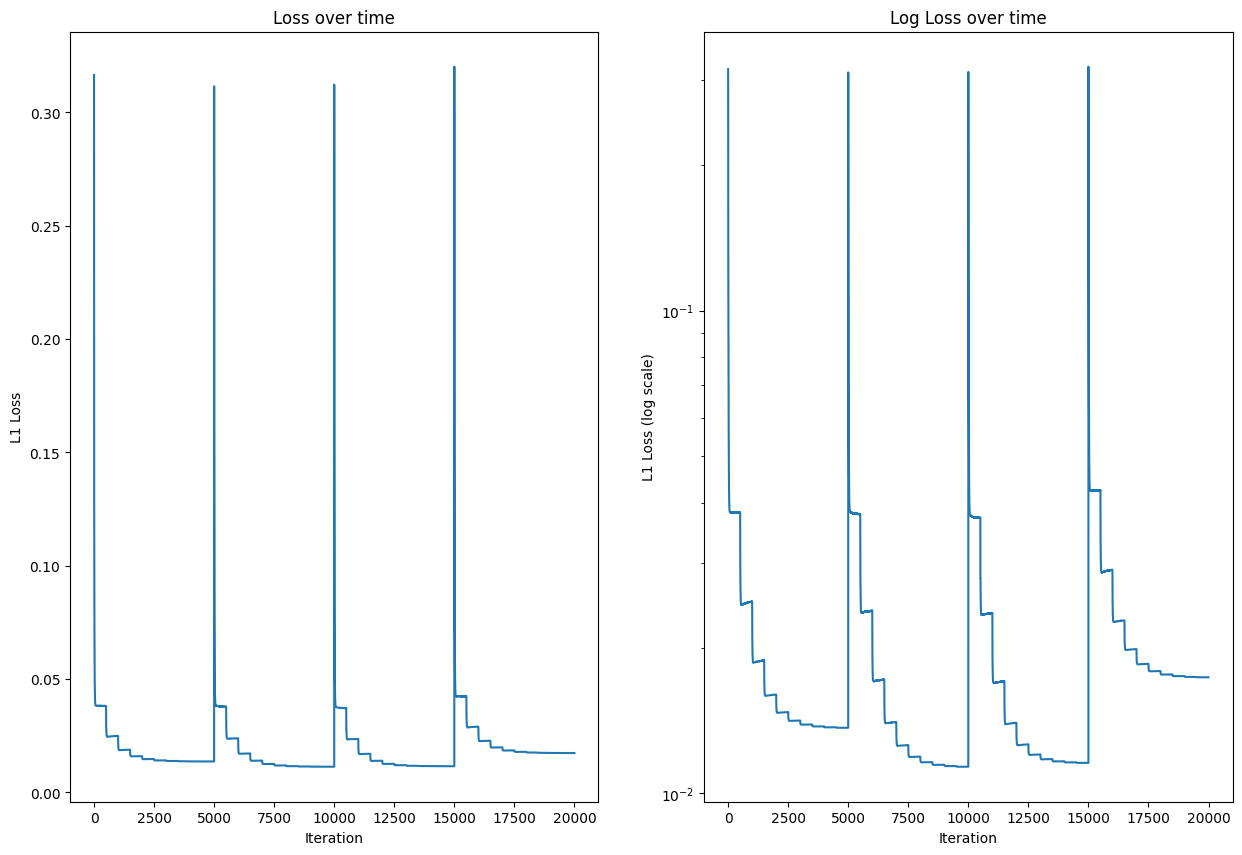

In [96]:
# plot losses over time
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over time")
plt.xlabel("Iteration")
plt.ylabel("L1 Loss")

plt.subplot(1, 2, 2)
plt.semilogy(losses)
plt.title("Log Loss over time")
plt.xlabel("Iteration")
plt.ylabel("L1 Loss (log scale)")

plt.show()


In [97]:
X_np_all = X_np_all.reshape(C,R,W)

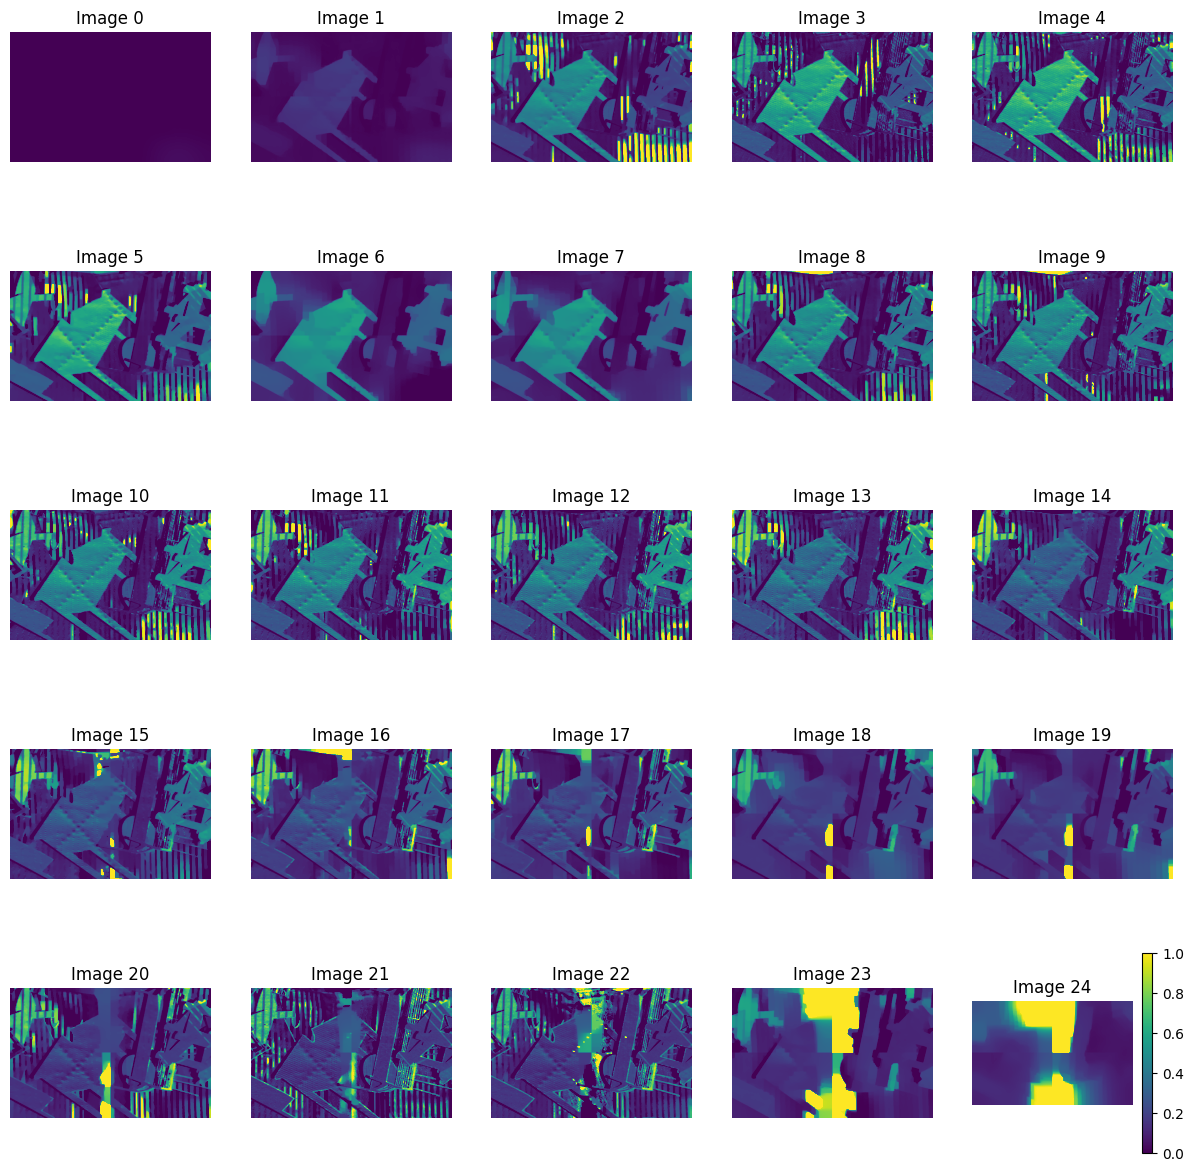

In [98]:
max_images_per_column = 5
num_columns = (W + max_images_per_column - 1) // max_images_per_column
plt.figure(figsize=(15, 3*num_columns))

for c in range(num_columns):
    start_index = c * max_images_per_column
    end_index = min(start_index + max_images_per_column, W)
    num_images = end_index - start_index
    
    for i in range(num_images):
        plt.subplot(num_columns, num_images, i + c * num_images + 1)
        plt.imshow(X_np_all[:, :, i + start_index], vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f"Image {i + start_index}")
        
        if i + start_index == W - 1:
            plt.colorbar()